Text(0.5, 1.0, 'Transformed')

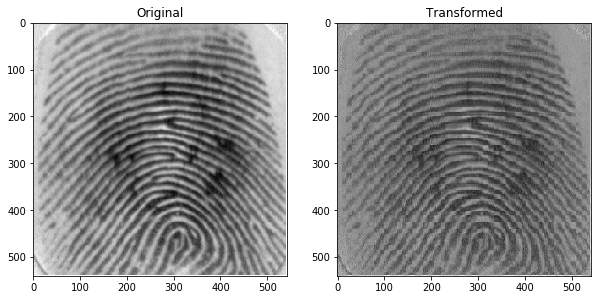

In [1]:
#Attempt at using contrast kernel
%matplotlib inline
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

fingerprint = mpimg.imread('Fingerprint.PNG')#img src: given problem
fingerprint = rgb2gray(fingerprint)

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1,2,1)
plt.imshow(fingerprint, cmap = 'gray')
plt.gca().set_title('Original')

orig = np.copy(fingerprint)
fingerprint = fft.fft2(fingerprint)

y = fingerprint.shape[0]
x = fingerprint.shape[1]
center_x = x//2
center_y = y//2
mask = np.zeros([y,x])
for j in range(y):
    for i in range(x):    
        if center_x - 1 <= i <= center_x + 1 and center_y - 1 <= j <= center_y + 1:
            if j == center_y and i == center_x:
                mask[j][i] = 5
            elif i == center_x:
                if j == center_y - 1 or j == center_y + 1:
                    mask[j][i] = -1
            elif j == center_y:
                if i == center_x - 1 or i == center_x + 1:
                    mask[j][i] = -1
            else:
                mask[j][i] = 0

mask = fft.fft2(mask)
img = fingerprint*mask
img = fft.ifft2(img)
img = fft.ifftshift(img)

img = abs(img)
fig.add_subplot(1,2,2)
plt.imshow(img, cmap = 'gray')
plt.gca().set_title('Transformed')

'''
Used contrast kernel for FT. By definition, contrast should lighten light portions and darken dark portions.
Did not seem to work but the blotch seems cleaner.
'''

Text(0.5, 1.0, 'Transformed')

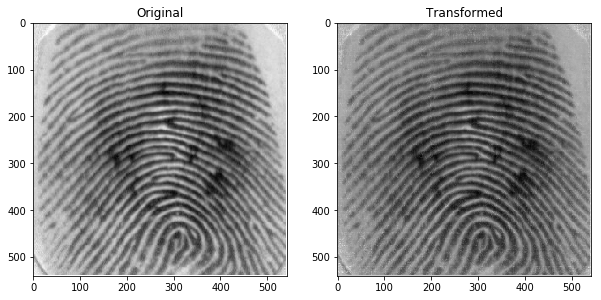

In [2]:
#Attempt using sobel operator
%matplotlib inline
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

fingerprint = mpimg.imread('Fingerprint.PNG')#img src: given problem
fingerprint = rgb2gray(fingerprint)

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1,2,1)
plt.imshow(fingerprint, cmap = 'gray')
plt.gca().set_title('Original')

orig = np.copy(fingerprint)
fingerprint = fft.fft2(fingerprint)
fingerprint = fft.fftshift(fingerprint)

#sobel operator
y = fingerprint.shape[0]
x = fingerprint.shape[1]
center_x = x//2
center_y = y//2
mask1 = np.zeros([y,x])
mask2 = np.zeros([y,x])
for j in range(y):
    for i in range(x):
        if center_y-1 <= j <= center_y+1 and center_x-1 <= i <= center_x+1:
            if j == center_y:
                mask1[j][i] = 0
            elif j == center_y-1:
                if i == center_x:
                    mask1[j][i] = -2
                else:
                    mask1[j][i] = -1
            elif j == center_y+1:
                if i == center_x:
                    mask1[j][i] = 2
                else:
                    mask1[j][i] = 1
                    
            if i == center_x:
                mask2[j][i] = 0
            elif i == center_x-1:
                if j == center_y:
                    mask2[j][i] = -2
                else:
                    mask2[j][i] = -1
            elif i == center_x+1:
                if j == center_y:
                    mask2[j][i] = 2
                else:
                    mask2[j][i] = 1
#plt.imshow(mask2)
mask1 = fft.fft2(mask1)
mask2 = fft.fft2(mask2)


img1,img2 = fingerprint*mask1,fingerprint*mask2
img1,img2 = fft.ifft2(img1),fft.ifft2(img2)
img = np.sqrt(img1**2 + img2**2)
img = abs(fft.fftshift(img))

orig += img

fig.add_subplot(1,2,2)
plt.imshow(orig, cmap = 'gray')
plt.gca().set_title('Transformed')

'''
Tried using sobel operator. Was hoping to get a negative image to subtract from original to darken and lighten where need be.
Implemented. My untrained eyes see no difference.
'''